Zadanie: Katastrofa klimatyczna

Dane: https://www.kaggle.com/datasets/sevgisarac/temperature-chang
e
Cel: analiza danych dotyczących zmian średnich temperat
ur
Stakeholder: agencja rządowa, która ma przedstawićraport na forum międzynarodowym i
potrzebuje solidnych bulle
tów

Plik - FAOSTAT Temperature Change udostępnia statystyki zmian średniej temperatury  według krajów, która aktualizowana jest rocznie. Zaprezentowane  dane obejmują okres od 1961 do 2019 roku. Statystyki są dostępne dla miesięcznych, sezonowych oraz rocznych średnich  temperatur, obejmującej okres 1951–1980. Dane również uwzględniają odchylenia standardowe zmian temperatury. Dane opierają się na publicznie dostępnych danych GISTEMP, tj. globalnych zmianach temperatury powierzchniowej udostępnianych przez Goddard Institute for Space Studies (NASA-GISS) – Narodową Agencję Aeronautyki i Przestrzeni Kosmicznej USA

1. Pobranie potrzebnych bibliotek

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



2. Wczytanie danych , w tym przypadku należało uwzględnić encoding, gdyż po przez zwykłe łądowanie danych przez metode pd.read_csv wyrzucało błąd. Wyświetlone jest również 5 pierwszychkolum w celu zapozania się z schematem danych

In [2]:

path = 'Environment_Temperature_change_E_All_Data_NOFLAG.csv'
data = pd.read_csv(path, encoding='ISO-8859-1')
data.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


Kolejnym punktem jest zapoznanie sie z wartościami zawartymi w całym zbiorze . Zauważyc można, że w zakresie lat Y1961-Y2019 występują wartości NULL.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

Wizualizacja jak wygląda rozkład brakujących danych

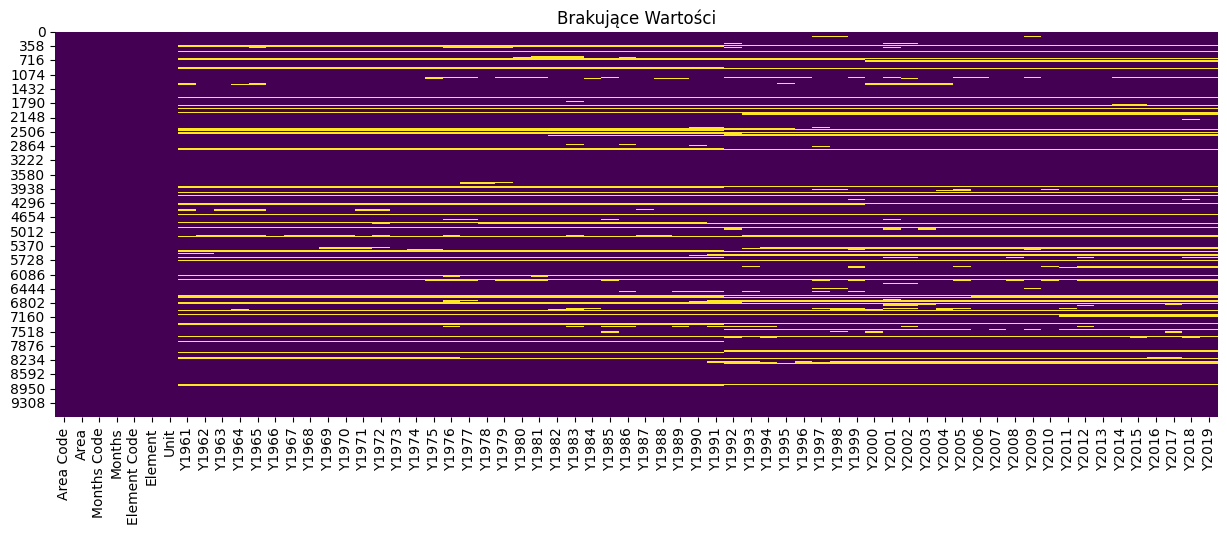

In [4]:
plt.figure(figsize=(15, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Brakujące Wartości")
plt.show()

Metoda describe() wylicza postawowe statystyki dla wszstkich kolumn, zawartej w zbiorze. Na podstawie tych statystyk w tym rodzaju analizy problemu, ciężko jest stwierdzić jakieś zależności temepraturowe

In [5]:
data.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


Następnie prostą pętlą sprawdzam czy występują jakieś duplikaty, jęzeli tak należy je usunąć, gdyż nadmierna redundancja danych sprawia, że analiza dancyh jest nieefektywna. W moim przypadku nie występują one

In [6]:
if data.duplicated().sum() > 0:
    print('Wystęoują duplikaty')
else:
    print('Brak duplikatów')

Brak duplikatów


Następnie wyodrębniam z Kolumny - Element , dane dotyczące zmiany temperatury - Temperature Change oraz pozbywam sie etykiet :  'Area Code', 'Months Code', 'Element Code', 'Element', 'Unit', ponieważ nie mają one żadnego sensu biznesowego w daleszj analizie. Transponuje macierz, co sprawia, że wyniki są łatwiejsze w wizualizacji

In [7]:
data = data[data['Element'] == 'Temperature change']
data = data.drop(columns=['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'])


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Y1961,4152.0,0.144488,0.796846,-4.018,-0.24300,0.0570,0.42100,5.771
Y1962,4161.0,-0.028981,0.753350,-5.391,-0.28100,-0.0330,0.25900,4.366
Y1963,4147.0,-0.026252,1.002534,-8.483,-0.30400,0.0300,0.36300,4.666
Y1964,4127.0,-0.122131,0.775030,-7.309,-0.45650,-0.1020,0.22850,5.233
Y1965,4149.0,-0.224178,0.696759,-4.728,-0.51800,-0.2130,0.07300,5.144
Y1966,4199.0,0.095070,0.843751,-8.147,-0.21900,0.0570,0.38200,5.771
Y1967,4182.0,-0.131975,0.724055,-6.531,-0.44000,-0.1680,0.13700,4.768
Y1968,4186.0,-0.167675,0.762724,-8.407,-0.47300,-0.1630,0.15075,4.092
Y1969,4178.0,0.105796,0.825806,-6.784,-0.16500,0.1750,0.47700,4.411
Y1970,4171.0,0.071811,0.698364,-5.847,-0.20800,0.0960,0.40400,2.999


In [9]:
data.columns = [col[1:] if col.startswith('Y') else col for col in data.columns]


Poniżej przedstawiona została reprezentacja zmian temperatury w roku 2019 w poszczególnych miesiącach.

C:\Users\piotr\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


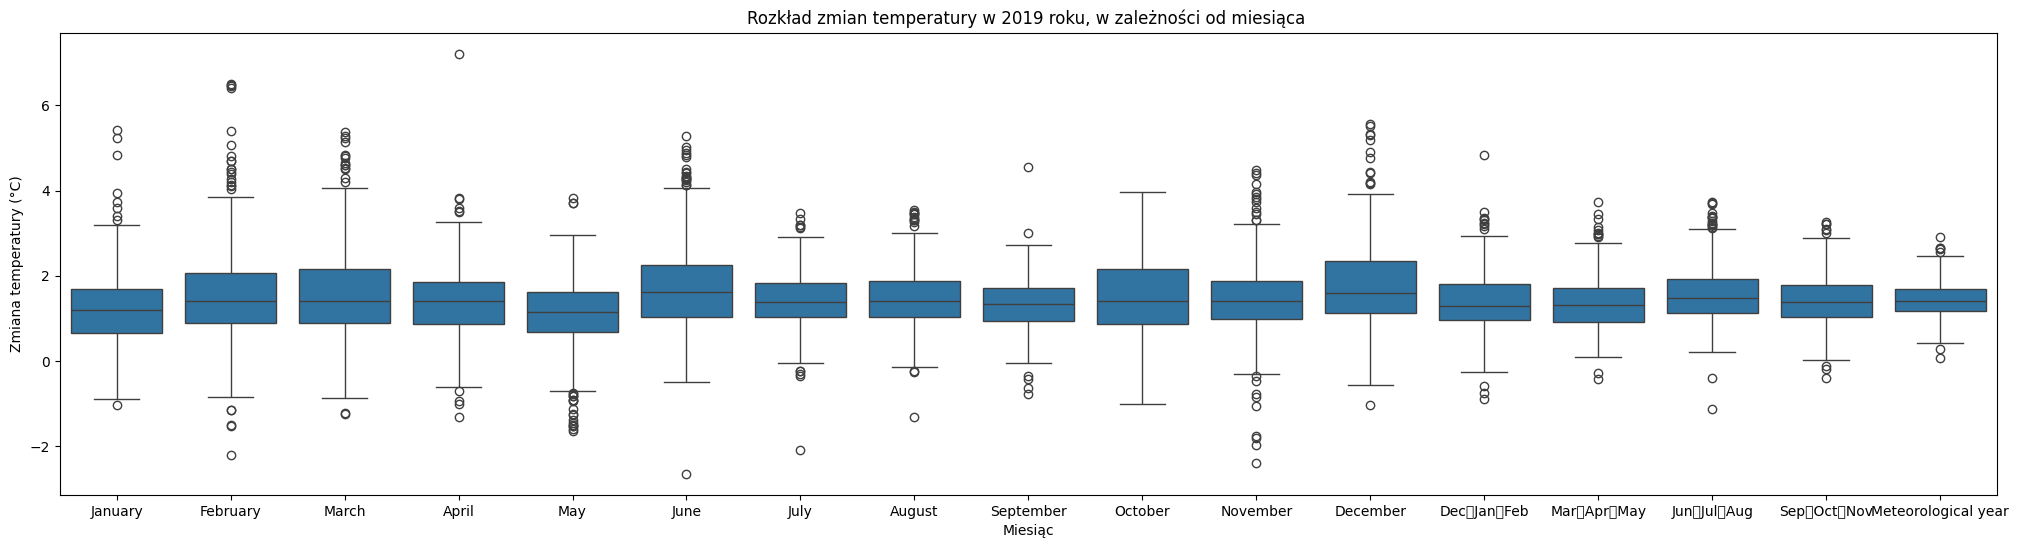

In [10]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=data, x='Months', y='2019')  
plt.title("Rozkład zmian temperatury w 2019 roku, w zależności od miesiąca ")
plt.xlabel("Miesiąc")
plt.ylabel("Zmiana temperatury (°C)")
plt.show()

Powyższy wykres z całkiem stabilną wartością mediany która oscyluje w przedziale 1.2. Największą medianę można zaobserwować w miesiącu June. Wartości odstające występują. Poniższa pętla ma zazadanie usunięcie wartości odstających. Obrałem w tym przypadku mętądę stosującą odrzucenia 3 odchyleń standardowych poniże oraz powyżej. Oraz wartości puste wypełniam medianą gdyż odporna jest na outlayiery

In [11]:


data.columns = [col[1:] if col.startswith('Y') else col for col in data.columns]

year_columns = [col for col in data.columns if col.isdigit()]

data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')

data[year_columns] = data[year_columns].apply(lambda x: x.fillna(x.median()))

for year in year_columns:
    year_mean = data[year].mean()
    year_std = data[year].std()
    data[year] = data[year].where(
        (data[year] >= year_mean - 3 * year_std) & (data[year] <= year_mean + 3 * year_std)
    )

    


Następnym krokiem jest wykres rozrzutu gęstości zmian średnich rocznych temperatur w latach 1961-20199

In [12]:
yearly_global_means = data[year_columns].mean()
#

In [13]:
plt.style.use('default')

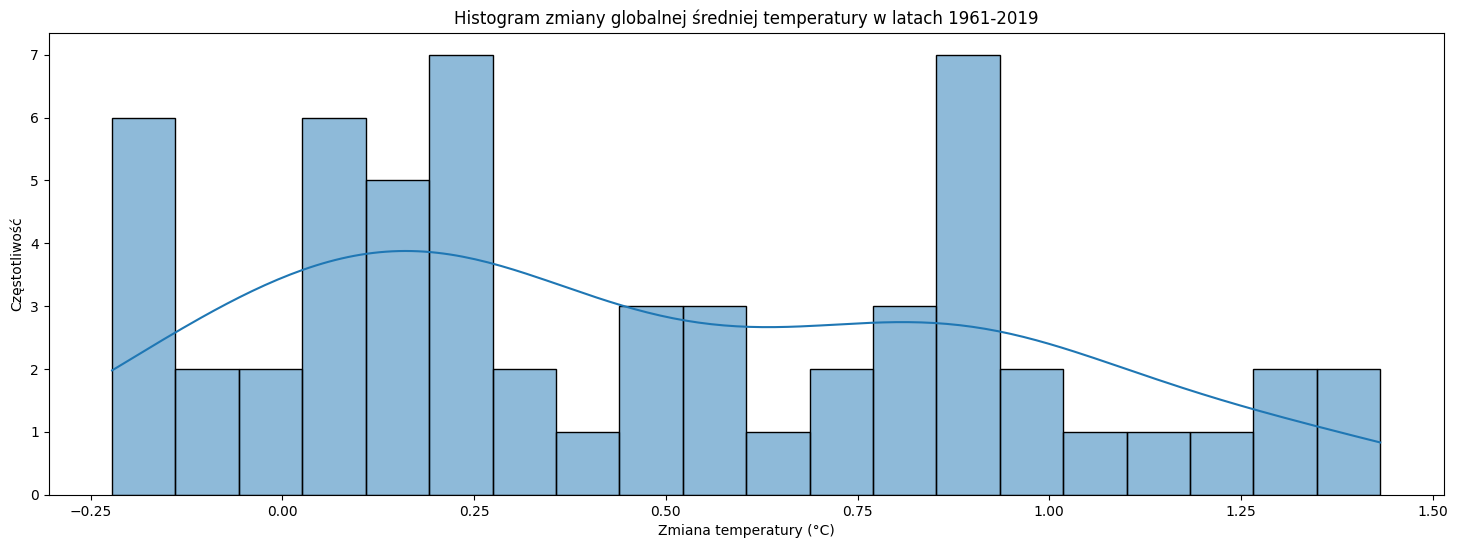

In [14]:
plt.figure(figsize=(18, 6))
sns.histplot(yearly_global_means, kde=True, bins=20)
plt.title('Histogram zmiany globalnej średniej temperatury w latach 1961-2019')
plt.xlabel('Zmiana temperatury (°C)')
plt.ylabel('Częstotliwość')
plt.show()


Histogam pokazuje zmiany w przedziale od około -0,2°C do 1,4°C. Wskazuje to na znaczne różnice w globalnych średnich temperaturach w badanym okresie. Najwięcej przypadków zmiany temperatury występuje w przedziałach blisko 0°C, 0,2°C oraz 0,8°C, co można zauważyć po szczytach histogramu na wysokości 6. Większość wartości jest dodatnia, co może wskazywać na trend wzrostu globalnej średniej temperatury w danym okresie, co jest spójne z obserwacjami globalnego ocieplenia.

Wykres globalnych średnich temperatur na przestrzeni lat 1961-2019

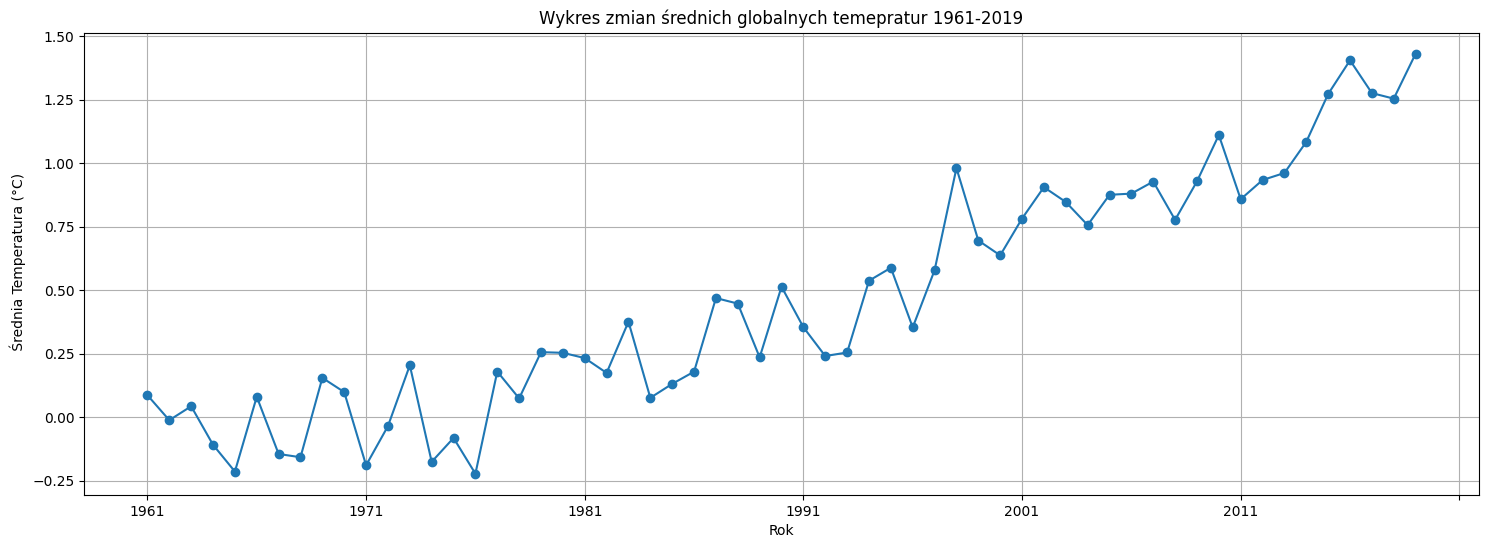

In [15]:
plt.figure(figsize=(18, 6))
yearly_global_means.plot(kind='line', marker='o')
plt.title('Wykres zmian średnich globalnych temepratur 1961-2019')
plt.xlabel('Rok')
plt.ylabel(' Średnia Temperatura (°C)')
plt.grid(True)
plt.show()

Na powyższym wykresie zaobserwować można trend rosnący średnich temperatur globalnych

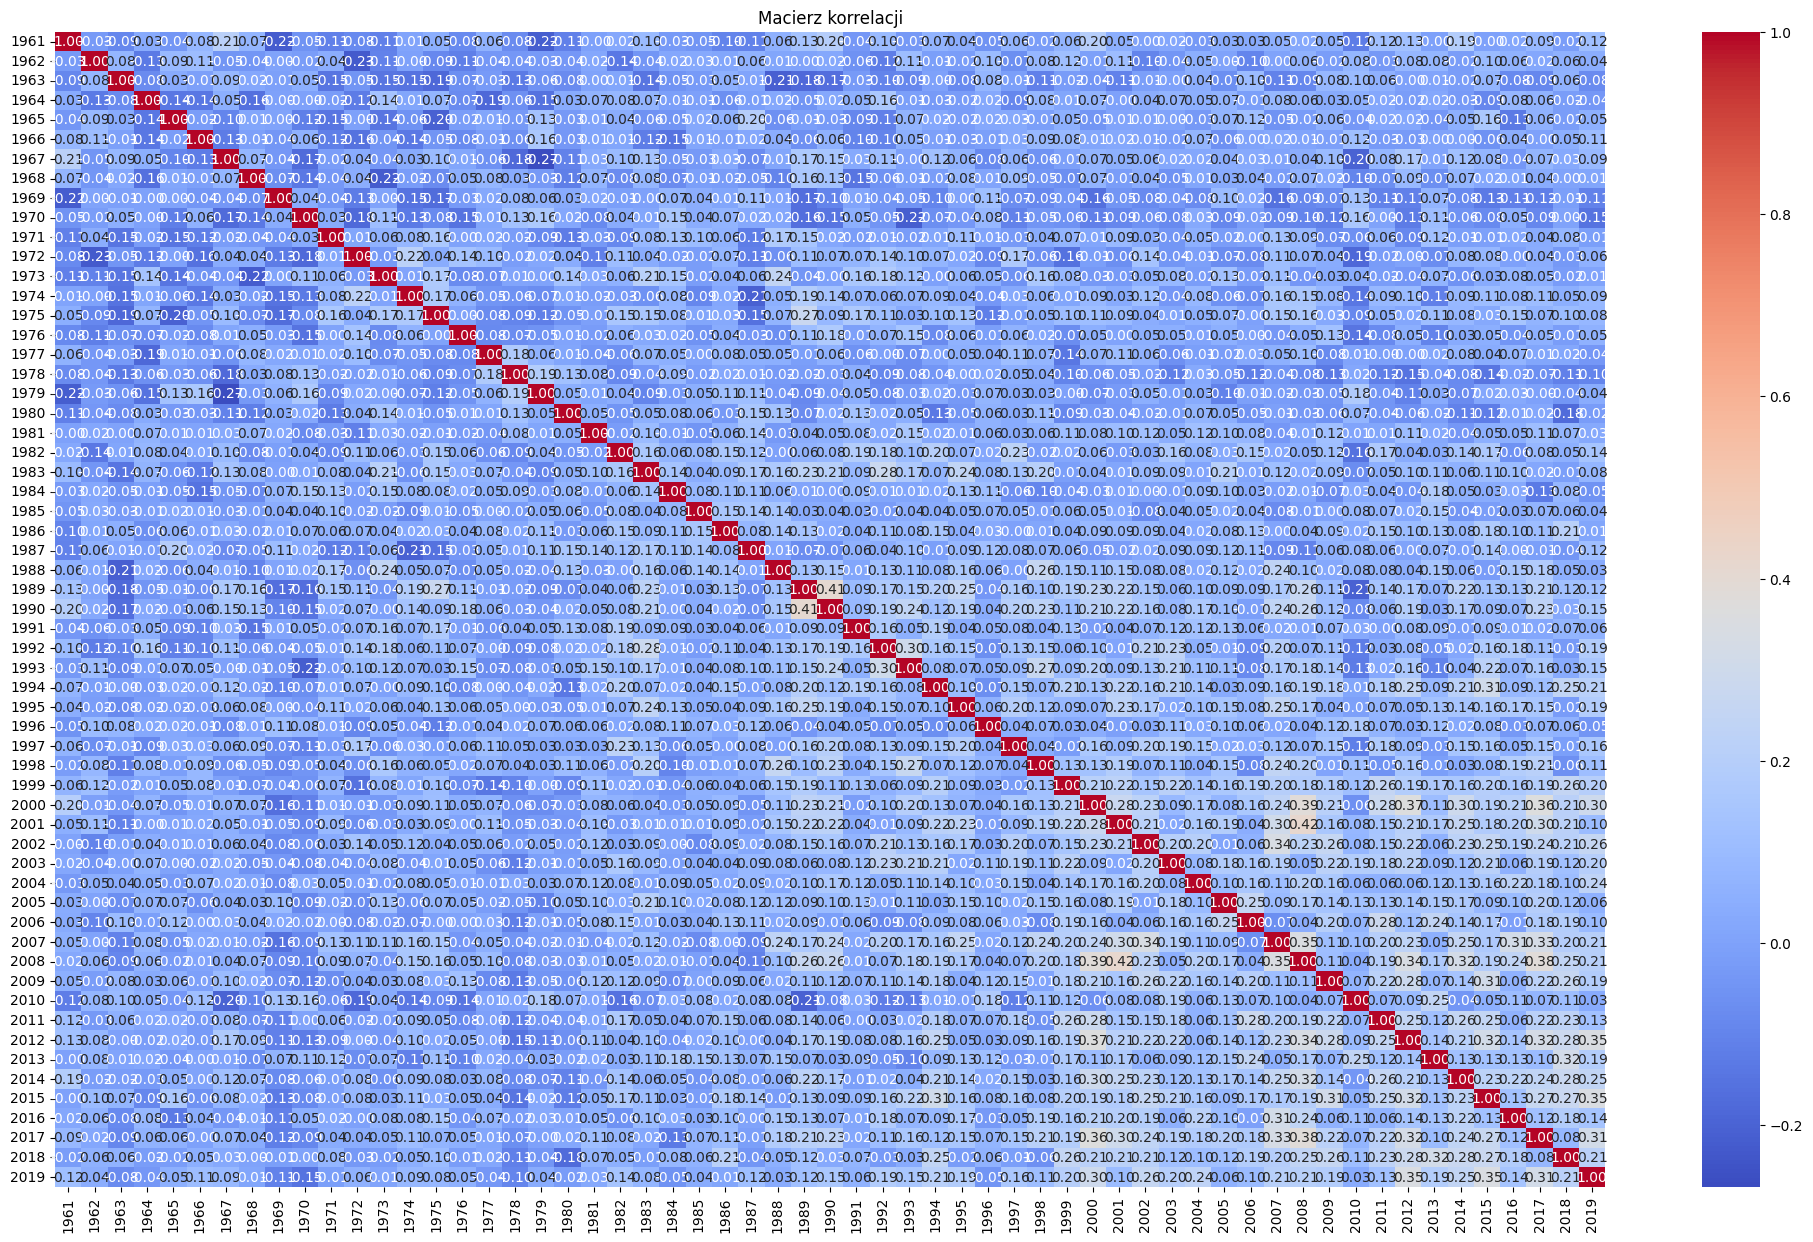

In [16]:

correlation_matrix = data[year_columns].corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Macierz korrelacji')
plt.show()










W macierzy korrelacji nie można zaobserwować większych korrelacji między latami. Największe korrelacje można zaobserwować między latami 2010-2019

Wykres poniższy reprezentuje przykładowych 15 państw z największym wzrostem średniej temperatury na przestrzeni badanego okresu czasu. Średni wzrost wynosi 0.75 stopni Celsjusza

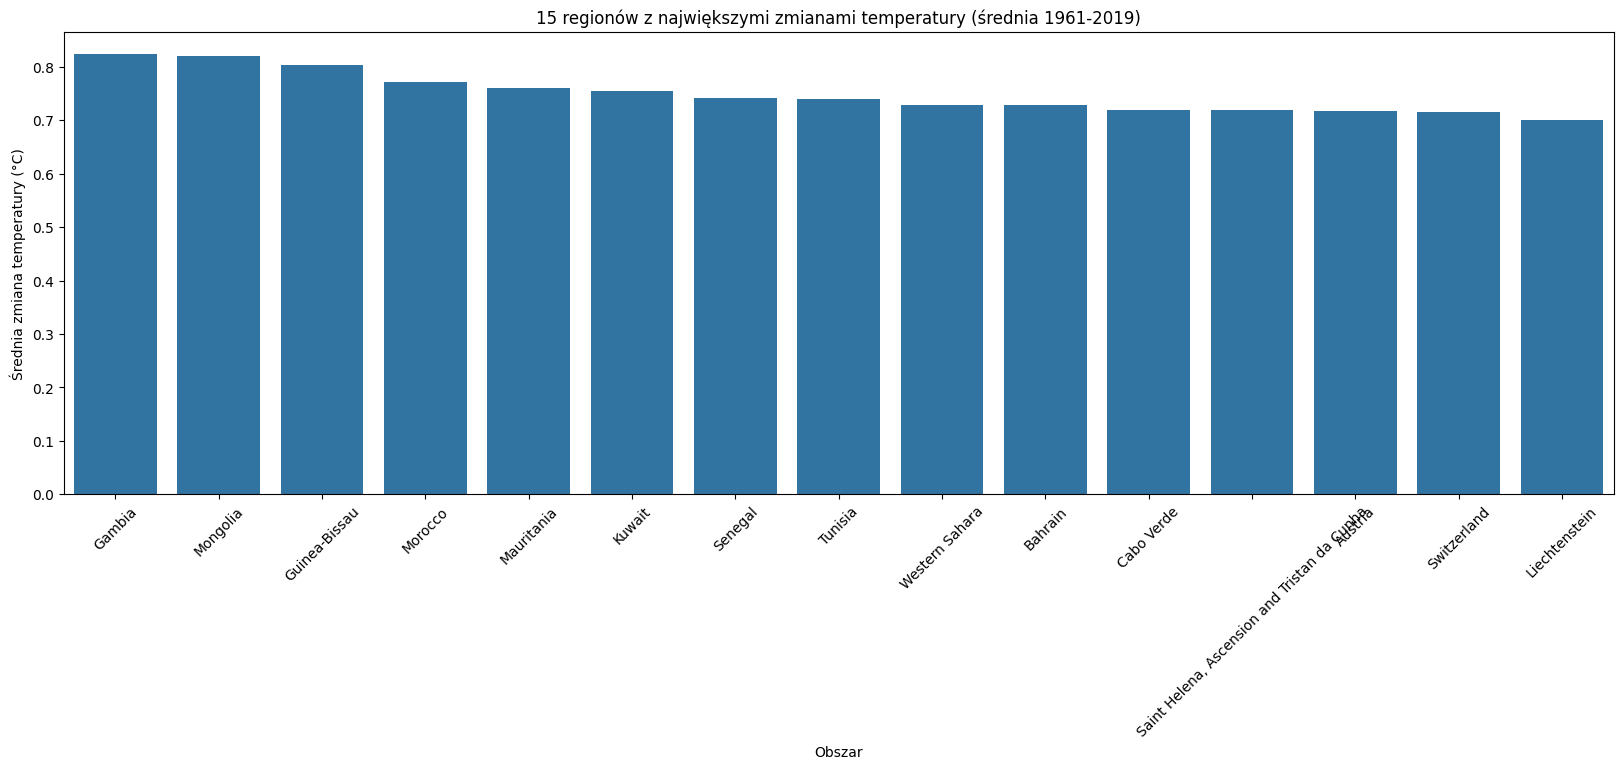

In [17]:

selected_years = [str(year) for year in range(1961, 2020)]
data['Average_2010s'] = data[selected_years].mean(axis=1)

plt.figure(figsize=(20, 6))
top_regions = data.groupby('Area')['Average_2010s'].mean().nlargest(15)
sns.barplot(x=top_regions.index, y=top_regions.values)
plt.title("15 regionów z największymi zmianami temperatury (średnia 1961-2019)")
plt.xticks(rotation=45)
plt.xlabel("Obszar")
plt.ylabel("Średnia zmiana temperatury (°C)")
plt.show()

Poniższy kod dzieli lata na dekady 

In [18]:
decades = {
    '1960': [str(year) for year in range(1960, 1970)],
    '1970': [str(year) for year in range(1970, 1980)],
    '1980': [str(year) for year in range(1980, 1990)],
    '1990': [str(year) for year in range(1990, 2000)],
    '2000': [str(year) for year in range(2000, 2010)],
    '2010': [str(year) for year in range(2010, 2020)],
}

decade_means = {}
for decade, years in decades.items():
    available_years = [year for year in years if year in data.columns]
    if available_years:  
        decade_means[decade] = data[available_years].mean().mean()



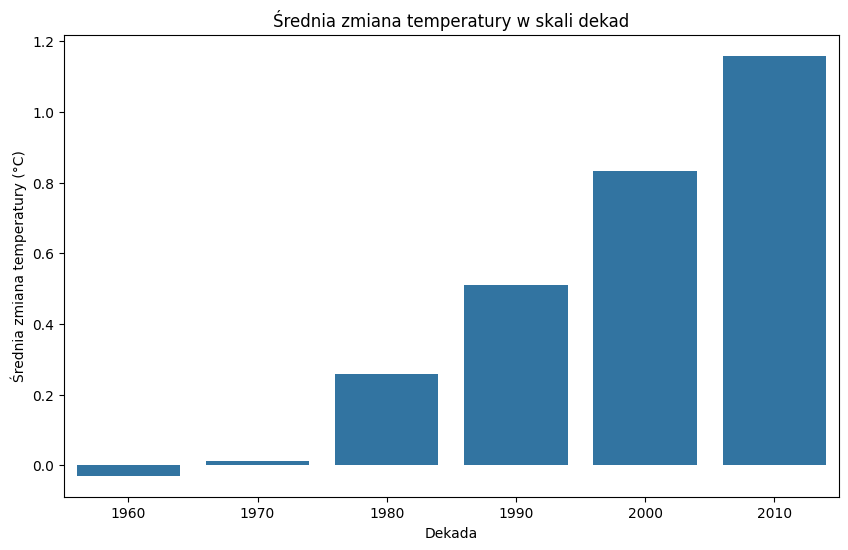

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(decade_means.keys()), y=list(decade_means.values()))
plt.title("Średnia zmiana temperatury w skali dekad")
plt.xlabel("Dekada")
plt.ylabel("Średnia zmiana temperatury (°C)")
plt.show()

Największy wzrost obserwujemy w dekadzie 2010-2019

Podział roku na pory roku oraz przedstawienie zależności pory roku i wzrostu temeratury w latach 1961-2019

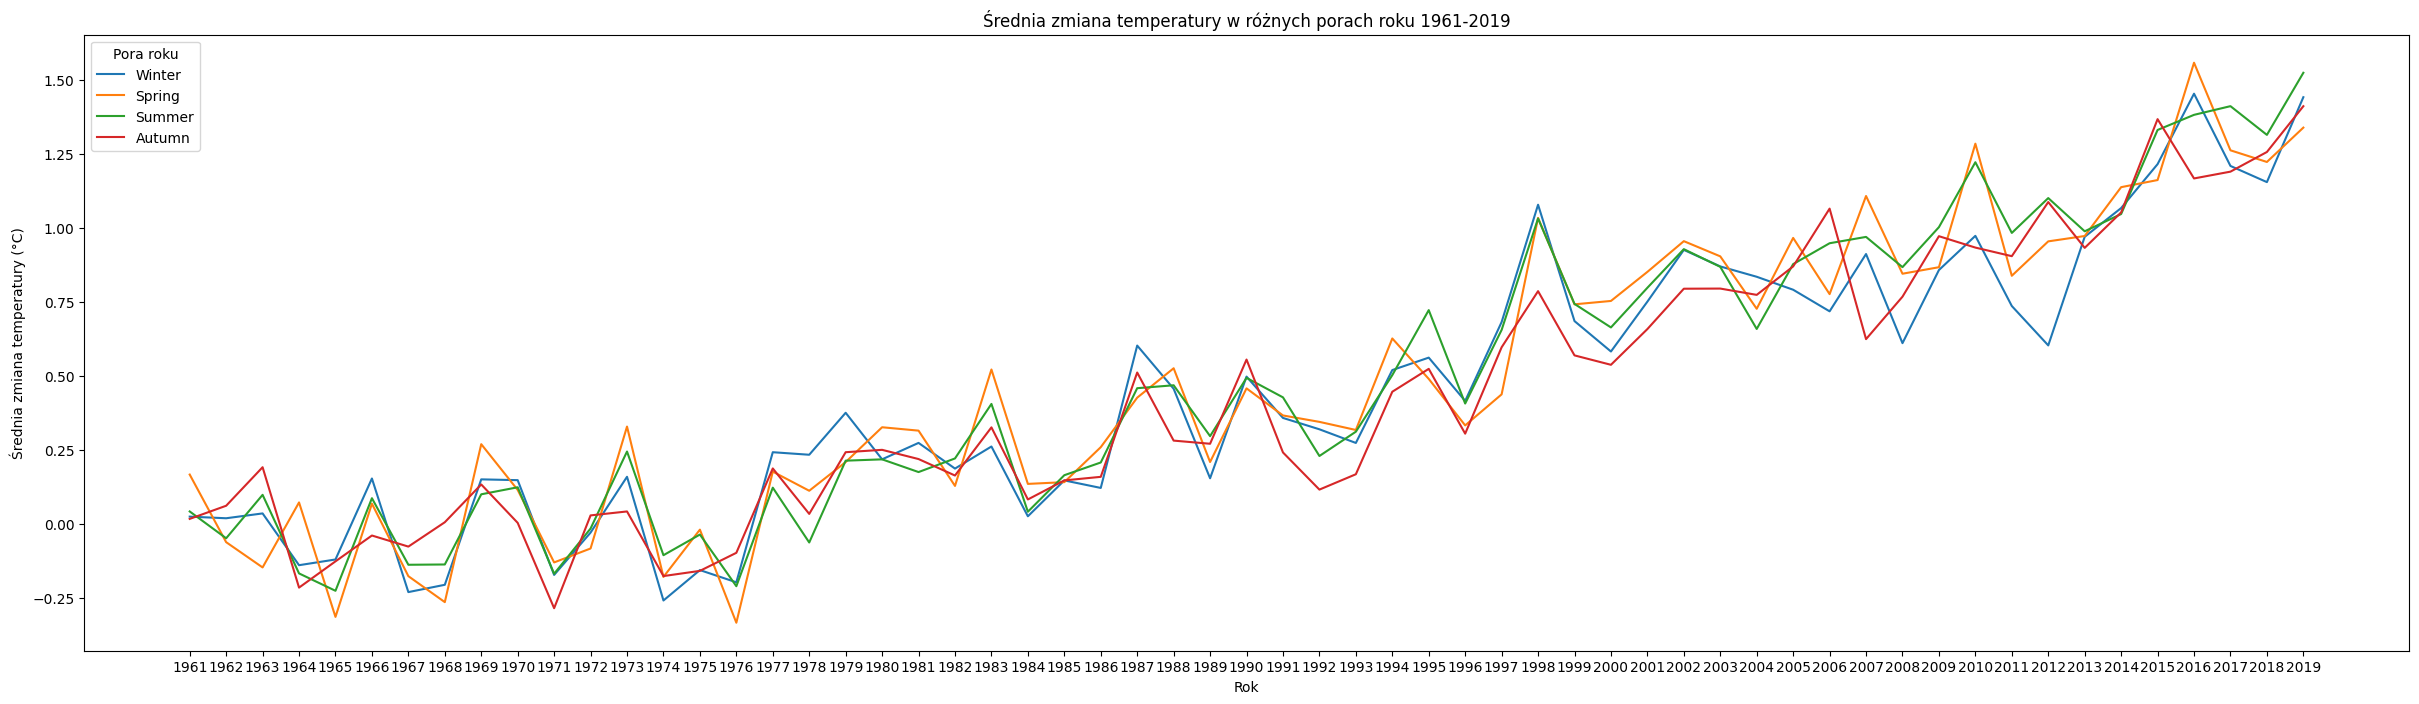

In [20]:


season_mapping = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Autumn', 'October': 'Autumn', 'November': 'Autumn'
}


data['Season'] = data['Months'].map(season_mapping)


year_columns = [col for col in data.columns if col.isdigit()]
seasonal_data = data.groupby(['Season'])[year_columns].mean()


seasonal_data = seasonal_data.loc[['Winter', 'Spring', 'Summer', 'Autumn']]


plt.figure(figsize=(30, 8))
for season in seasonal_data.index:
    plt.plot(year_columns, seasonal_data.loc[season], label=season)

# Ustawienia wykresu
plt.title("Średnia zmiana temperatury w różnych porach roku 1961-2019")
plt.xlabel("Rok")
plt.ylabel("Średnia zmiana temperatury (°C)")
plt.legend(title='Pora roku')
plt.show()

Średnia temperatura każdej pory roku w danym zakresie czasu ma tendencej rosnące

Poniższy kod przedstawia losowe wybranie z zakresu do 1 do 1000 co 10 kraj i przestawienie go na wykresie zmiany temperatury w skale badanego okresu 

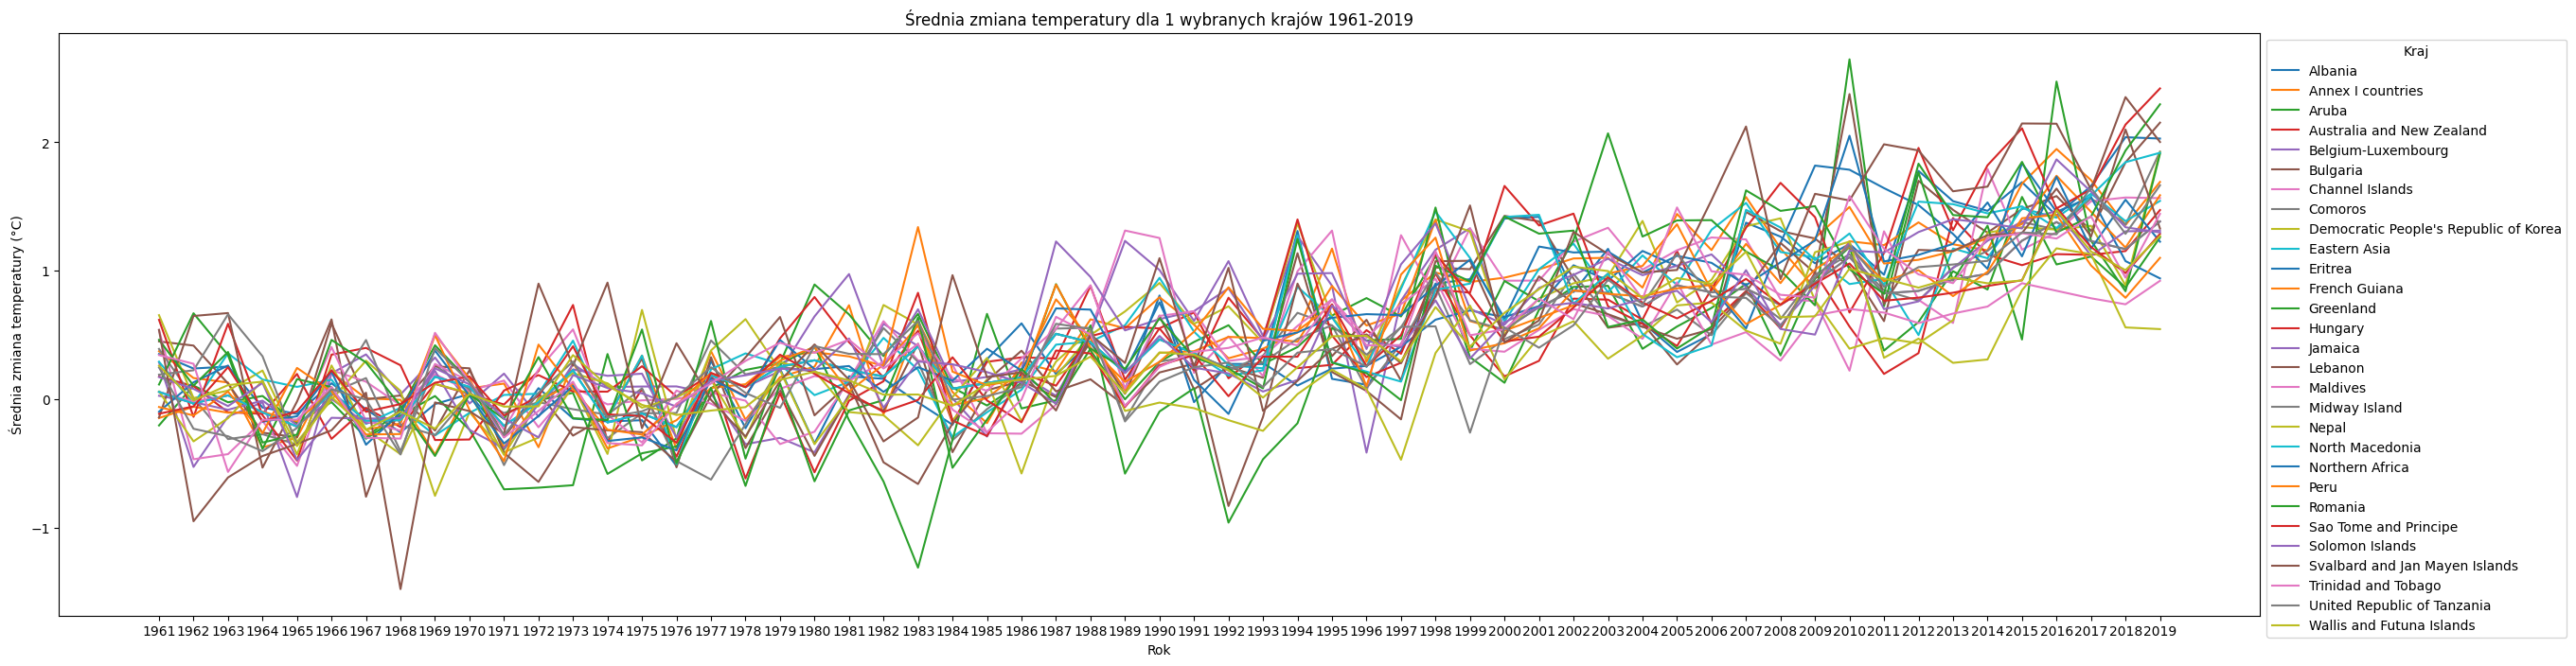

In [21]:

selected_countries = data['Area'].unique()[1:1000:10]  
country_data = data[data['Area'].isin(selected_countries)]


country_means = country_data.groupby('Area')[year_columns].mean()

plt.figure(figsize=(30, 8))
for country in country_means.index:
    plt.plot(year_columns, country_means.loc[country], label=country)

plt.title("Średnia zmiana temperatury dla 1 wybranych krajów 1961-2019")
plt.xlabel("Rok")
plt.ylabel("Średnia zmiana temperatury (°C)")
plt.legend(title='Kraj', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Zaobserwować można czasowy stały  wzrost średniej temperatury globalnej

Podsumowując powyższe dane oraz wykresy, które przedstawiają wyniki średnich emperatur przedstawiaja znaczny wzrost temperatury rocznie, co spowodowane może być globalnym ociepleniem

Dodadkowo mały model XgBoost


In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error






zmienną przewidywaną będzie zmienna która jest rokiem 2019, dzielę dane na zbiór testowy o wielkości 20%. Inicjalizuję instancję Xgb oraz wyliczam błąd średniokwadratowy jaką jedną z metryk 

In [23]:
X = data[year_columns[:-1]].dropna()  
y = data[year_columns[-1]].dropna() 

X, y = X.align(y, join='inner', axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=50)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

0.17209866066640575

W kolejnym kroku chce zrobić predykcję zmiany średniej temperatury dla lat od 2019-2024

In [24]:

 
last_known_data = X.iloc[-1].values.reshape(1, -1)  

predictions = []

for i in range(5):

    next_year_pred = xgb_model.predict(last_known_data)
    
    predictions.append(next_year_pred[0])
    
    last_known_data = np.append(last_known_data[:, 1:], next_year_pred).reshape(1, -1)


years = [2020 + i for i in range(5)]
forecast = dict(zip(years, predictions))
print("Prognozy na kolejne 5 lat:", forecast)

Prognozy na kolejne 5 lat: {2020: 1.305646, 2021: 1.6858051, 2022: 1.8948395, 2023: 1.5691593, 2024: 1.9866102}


z danych zawartych w internecie: 
2020: 1.20,
2021: 1,20,
2022: 1,30,
2023: 1,45


Model który zastosowałem ma zbliżone wartości podobne tylko dla lat 2020 i 2021, w kolejnych latach wzrost jest dużo wyższy niż w żródład meteorologicznych. Należałby zastosować inny model i porównać wartości 